# Text Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset\smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

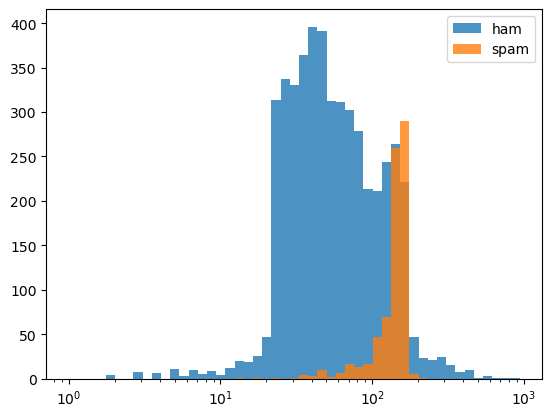

In [9]:
plt.xscale('log')
bins = 1.15 ** (np.arange(0, 50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

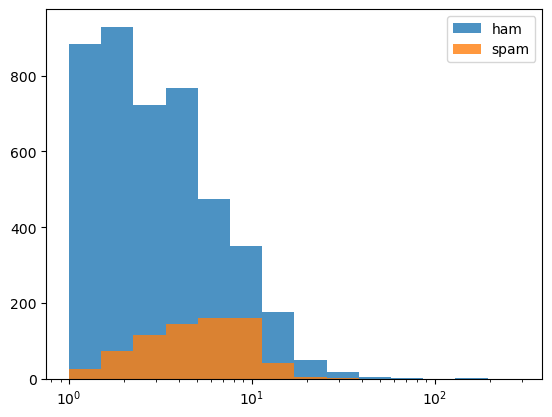

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
x = df[['length', 'punct']]
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print('Training Data Shape: ', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape:  (3733, 2)
Testing Data Shape:  (1839, 2)


In [13]:
y_train.value_counts()

ham     3232
spam     501
Name: label, dtype: int64

In [14]:
y_test.value_counts()

ham     1593
spam     246
Name: label, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
from sklearn import metrics

predictions = lr_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print(metrics.accuracy_score(y_test, predictions))

[[1547   46]
 [ 241    5]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839

0.843936922240348


In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

[[1583   10]
 [ 246    0]]
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839

0.8607939097335509


In [18]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

[[1515   78]
 [ 131  115]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839

0.8863512778684067


In [19]:
from sklearn.model_selection import train_test_split

X = df['message']  
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
y_train.value_counts()

ham     3232
spam     501
Name: label, dtype: int64

In [21]:
y_test.value_counts()

ham     1593
spam     246
Name: label, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

AttributeError: 'TfidfTransformer' object has no attribute 'fit_transformnsform'

In [ ]:
pd.DataFrame(X_train_tfidf)[0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC()),])

text_clf.fit(X_train, y_train)

predictions = text_clf.predict(X_test)

In [ ]:
from sklearn import metrics 

print(metrics.confusion_matrix(y_test, predictions))

In [ ]:
print(metrics.classification_report(y_test, predictions))

In [ ]:
print(metrics.accuracy_score(y_test, predictions))

In [ ]:
text_clf.predict(['Hi How are you?'])[0]

In [ ]:
text_clf.predict(['Congrats, you have won an S23!!'])[0]